In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = 'C:\\Users\\YN\\OneDrive\\Desktop\\Assignment 9\\cats and dogs\\cats and dogs\\training_set'
test = 'C:\\Users\\YN\\OneDrive\\Desktop\\Assignment 9\\cats and dogs\\cats and dogs\\test_set'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train, 
                                                    target_size=(64,64), 
                                                    batch_size=32, 
                                                    class_mode='binary')


Found 8000 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(test, 
                                                              target_size=(64, 64), 
                                                              batch_size=32, 
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


Build the CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3))) 

C:\Users\YN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Second convolutional layer
model.add(Conv2D(64, (3, 3), padding='same' , strides=(1,1) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# Third convolutional layer
model.add(Conv2D(128, (3, 3), padding='same' , strides=(1,1) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Flatten the output
model.add(Flatten())

In [18]:
# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

In [20]:
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,873 (56.61 MB)

 Trainable params: 14,839,873 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [27]:
history = model.fit(train_generator, 
                    steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                    epochs=20, 
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.samples // validation_generator.batch_size)     

C:\Users\YN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 113s 434ms/step - accuracy: 0.5397 - loss: 0.7196 - val_accuracy: 0.6094 - val_loss: 0.7024
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 425ms/step - accuracy: 0.6333 - loss: 0.6416 - val_accuracy: 0.6941 - val_loss: 0.5911
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 111s 443ms/step - accuracy: 0.6755 - loss: 0.6097 - val_accuracy: 0.7238 - val_loss: 0.5479
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 113s 450ms/step - accuracy: 0.7205 - loss: 0.5495 - val_accuracy: 0.7203 - val_loss: 0.5373
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 441ms/step - accuracy: 0.7495 - loss: 0.5056 - val_accuracy: 0.7757 - val_loss: 0.4771
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 109s 436ms/step - accuracy: 0.7657 - loss: 0.4770 - val_accuracy: 0.7596 - val_loss: 0.5203
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 108s 431ms/step - accuracy: 0.7820 - loss: 0.4552 - val_accuracy: 0.7918 - val_loss: 0.4396
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 423ms/step - accuracy: 0.8028 -

Evaluate the Model

In [29]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8186 - loss: 0.5075
Validation Loss: 0.4763593077659607
Validation Accuracy: 0.8345000147819519


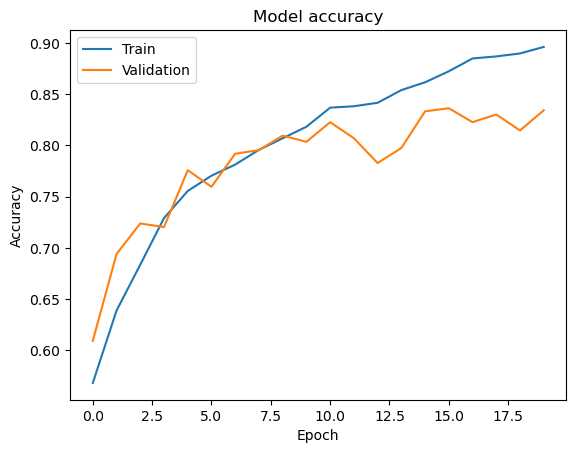

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

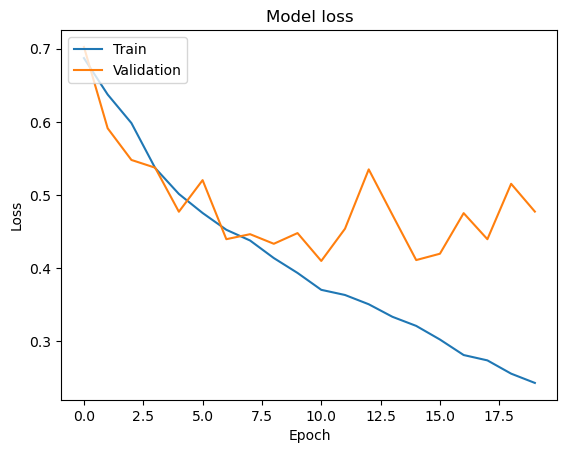

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Save the model

In [36]:
model.save('my_model.keras')

Make Predictions

In [43]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("It's a dog!")
    else:
        print("It's a cat!")

In [45]:
# Example usage
predict_image("C:\\Users\\YN\\OneDrive\\Desktop\\Assignment 9\\cats and dogs\\cats and dogs\\single_prediction\\cat_or_dog_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
It's a cat!


Build and Train an ANN 

In [48]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()
print(X_train.shape)  # Should output something like (60000, 28, 28)

(60000, 28, 28)


In [50]:
# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)

In [52]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, input_shape=(X_train_flatten.shape[1],), activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(1, activation='sigmoid'))

C:\Users\YN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Train the model
ann_history = ann_model.fit(X_train_flatten, y_train, 
                            epochs=20, 
                            batch_size=32, 
                            validation_data=(X_val_flatten, y_val))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1145 - loss: -424458934288384.0000 - val_accuracy: 0.1135 - val_loss: -482775832461312.0000
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1113 - loss: -487474056921088.0000 - val_accuracy: 0.1135 - val_loss: -547347780075520.0000
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1107 - loss: -552201160228864.0000 - val_accuracy: 0.1135 - val_loss: -617395978764288.0000
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1131 - loss: -623415174103040.0000 - val_accuracy: 0.1135 - val_loss: -693051894792192.0000
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1120 - loss: -696638125375488.0000 - val_accuracy: 0.1135 - val_loss: -774569904308224.0000
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1166 - loss: -776460226789376.0000 - val_accuracy: 0.1135 - val_loss: -862187505582080.0000
Epoch 7/20
1875/1875 ━━━━━━━

In [60]:
# Evaluate the model
ann_loss, ann_accuracy = ann_model.evaluate(X_val_flatten, y_val)
print(f'ANN Validation Loss: {ann_loss}')
print(f'ANN Validation Accuracy: {ann_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1160 - loss: -2700179903873024.0000
ANN Validation Loss: -2837067490918400.0
ANN Validation Accuracy: 0.11349999904632568
